In [348]:
import pandas as pd
import numpy as np

# Sample size
n_samples = 100
np.random.seed(42)

# Generate demographics
demographics = {
    'Age': np.random.randint(20, 70, n_samples),
    'Gender': np.random.choice(['Male', 'Female'], n_samples)
}

# Generate health symptoms
health_symptoms = {
    'Digestive_Issues_Frequency': np.random.choice(['Never', 'Sometimes', 'Often', 'Always'], n_samples, p=[0.3, 0.4, 0.2, 0.1]),
    'Food_Allergies': np.random.choice([0, 1], n_samples, p=[0.7, 0.3]),  # 0: No, 1: Yes
    'Health_Conditions': np.random.choice([0, 1], n_samples, p=[0.8, 0.2])  # 0: No health issues, 1: Has health conditions
}

# Generate dietary habits
dietary_habits = {
    'Diet_Type': np.random.choice(['Omnivore', 'Vegetarian', 'Vegan', 'Gluten-Free'], n_samples),
    'Processed_Food_Consumption': np.random.choice(['Rarely', 'Sometimes', 'Often'], n_samples, p=[0.3, 0.5, 0.2]),
    'Fiber_Food_Intake': np.random.choice(['Rarely', 'Sometimes', 'Often'], n_samples, p=[0.3, 0.5, 0.2])
}

# Generate lifestyle factors
lifestyle_factors = {
    'Exercise_Frequency': np.random.choice(['Sedentary', 'Occasional', 'Regular'], n_samples, p=[0.4, 0.4, 0.2]),
    'Stress_Level': np.random.randint(1, 11, n_samples),  # 1 to 10 scale
    'Sleep_Quality': np.random.randint(1, 11, n_samples)  # 1 to 10 scale
}

# Define weights for each factor with a more neutral, unbiased distribution
weights = {
    # Demographics
    'Age': 0.05,  # Smaller weight for age
    'Gender': {'Male': 0.05, 'Female': 0.05},
    
    # Health Symptoms
    'Digestive_Issues_Frequency': {
        'Never': 0.0,
        'Sometimes': 0.05,
        'Often': 0.1,
        'Always': 0.1
    },
    'Food_Allergies': {
        0: 0.0,  # No allergies
        1: 0.1  # Some weight for allergies
    },
    'Health_Conditions': {
        0: 0.0,  # No health conditions
        1: 0.1  # Some weight for health conditions
    },
    
    # Dietary Habits
    'Processed_Food_Consumption': {
        'Rarely': 0.05,
        'Sometimes': 0.1,
        'Often': 0.1
    },
    'Fiber_Food_Intake': {
        'Rarely': 0.05,  # Low weight for rare fiber intake
        'Sometimes': 0.05,
        'Often': 0.1  # Higher weight for high fiber intake
    },
    
    # Lifestyle Factors
    'Exercise_Frequency': {
        'Sedentary': 0.05,
        'Occasional': 0.05,
        'Regular': 0.1  # More weight for regular exercise
    },
    'Stress_Level': {
        1: 0.0, 2: 0.05, 3: 0.05, 4: 0.05, 5: 0.05, 6: 0.1, 7: 0.1,
        8: 0.1, 9: 0.1, 10: 0.1  # Uniform distribution across stress levels
    },
    'Sleep_Quality': {
        1: 0.0, 2: 0.05, 3: 0.05, 4: 0.05, 5: 0.1, 6: 0.1, 7: 0.1,
        8: 0.1, 9: 0.1, 10: 0.1  # Uniform distribution across sleep levels
    }
}

# Initialize an empty list to hold the lab test scores
lab_test_needs = []

# Calculate the score for each person based on all the factors and their weights
for i in range(n_samples):
    score = 0
    
    # Demographics (Age and Gender)
    score += weights['Age'] * (age := demographics['Age'][i]) / 70  # Normalize Age (scaled 0-1)
    score += weights['Gender'][demographics['Gender'][i]]  # Gender weight
    
    # Health Symptoms
    score += weights['Digestive_Issues_Frequency'][health_symptoms['Digestive_Issues_Frequency'][i]]
    score += weights['Food_Allergies'][health_symptoms['Food_Allergies'][i]]
    score += weights['Health_Conditions'][health_symptoms['Health_Conditions'][i]]
    
    # Dietary Habits
    score += weights['Processed_Food_Consumption'][dietary_habits['Processed_Food_Consumption'][i]]
    score += weights['Fiber_Food_Intake'][dietary_habits['Fiber_Food_Intake'][i]]
    
    # Lifestyle Factors (Exercise, Stress, Sleep)
    score += weights['Exercise_Frequency'][lifestyle_factors['Exercise_Frequency'][i]]
    score += weights['Stress_Level'][lifestyle_factors['Stress_Level'][i]]
    score += weights['Sleep_Quality'][lifestyle_factors['Sleep_Quality'][i]]
    
    # Normalize the score to ensure it's <= 1 (cap the score at max_possible_score)
    normalized_score = min(score, 1.0)
    
    # Append the final normalized score to the list
    lab_test_needs.append(normalized_score)

# Combine all data into a DataFrame
questionnaire_df = pd.DataFrame({**demographics, **health_symptoms, **dietary_habits, **lifestyle_factors, 'Lab_Test_Needed': lab_test_needs})

# Apply a threshold to determine whether a lab test is needed (score > 0.5 means test needed)
threshold = 0.5
questionnaire_df['Lab_Test_Needed'] = questionnaire_df['Lab_Test_Needed'].apply(lambda x: 1 if x > threshold else 0)

# Check the distribution of Lab_Test_Needed
print(questionnaire_df['Lab_Test_Needed'].value_counts())

# Display first few rows of the questionnaire dataset
questionnaire_df.head()


Lab_Test_Needed
1    52
0    48
Name: count, dtype: int64


,Age,Gender,Digestive_Issues_Frequency,Food_Allergies,Health_Conditions,Diet_Type,Processed_Food_Consumption,Fiber_Food_Intake,Exercise_Frequency,Stress_Level,Sleep_Quality,Lab_Test_Needed
0,58,Male,Sometimes,1,0,Omnivore,Often,Sometimes,Regular,4,6,1
1,48,Female,Never,0,0,Vegan,Often,Sometimes,Sedentary,8,8,0
2,34,Male,Sometimes,0,0,Gluten-Free,Sometimes,Often,Regular,4,1,0
3,62,Female,Always,0,1,Omnivore,Sometimes,Rarely,Sedentary,8,7,1
4,27,Female,Never,0,0,Vegan,Rarely,Sometimes,Sedentary,8,1,0


In [350]:
questionnaire_df['Lab_Test_Needed'].value_counts()

Lab_Test_Needed
1    52
0    48
Name: count, dtype: int64

In [352]:
# Save the DataFrame to a CSV file
questionnaire_df.to_csv('questionnaire_gut_health_data.csv', index=False)

print("Questionnaire dataset generated and saved as 'questionnaire_gut_health_data.csv'.")

Questionnaire dataset generated and saved as 'questionnaire_gut_health_data.csv'.


In [354]:
# Check for missing values
missing_values = questionnaire_df.isnull().sum()

# # Impute missing values (if any) - for simplicity, we use mean imputation for numerical and mode for categorical
# questionnaire_df['Age'].fillna(questionnaire_df['Age'].mean(), inplace=True)
# questionnaire_df['Stress_Level'].fillna(questionnaire_df['Stress_Level'].median(), inplace=True)

# # For categorical columns, we use the most frequent category
# categorical_columns = ['Gender', 'Digestive_Issues_Frequency', 'Diet_Type', 'Processed_Food_Consumption', 'Fiber_Food_Intake']
# for col in categorical_columns:
#     questionnaire_df[col].fillna(questionnaire_df[col].mode()[0], inplace=True)

In [356]:
missing_values 

Age                           0
Gender                        0
Digestive_Issues_Frequency    0
Food_Allergies                0
Health_Conditions             0
Diet_Type                     0
Processed_Food_Consumption    0
Fiber_Food_Intake             0
Exercise_Frequency            0
Stress_Level                  0
Sleep_Quality                 0
Lab_Test_Needed               0
dtype: int64

In [358]:
from sklearn.preprocessing import LabelEncoder

# Encode ordinal features
label_encoder = LabelEncoder()
questionnaire_df['Digestive_Issues_Frequency'] = label_encoder.fit_transform(questionnaire_df['Digestive_Issues_Frequency'])
questionnaire_df['Fiber_Food_Intake'] = label_encoder.fit_transform(questionnaire_df['Fiber_Food_Intake'])
questionnaire_df['Processed_Food_Consumption'] = label_encoder.fit_transform(questionnaire_df['Processed_Food_Consumption'])
questionnaire_df['Exercise_Frequency'] = label_encoder.fit_transform(questionnaire_df['Exercise_Frequency'])

In [360]:
# One-Hot Encoding for nominal data
questionnaire_df = pd.get_dummies(questionnaire_df, columns=['Gender', 'Diet_Type'], drop_first=True)

In [362]:
questionnaire_df

,Age,Digestive_Issues_Frequency,Food_Allergies,Health_Conditions,Processed_Food_Consumption,Fiber_Food_Intake,Exercise_Frequency,Stress_Level,Sleep_Quality,Lab_Test_Needed,Gender_Male,Diet_Type_Omnivore,Diet_Type_Vegan,Diet_Type_Vegetarian
0,58,3,1,0,0,2,1,4,6,1,True,True,False,False
1,48,1,0,0,0,2,2,8,8,0,False,False,True,False
2,34,3,0,0,2,0,1,4,1,0,True,False,False,False
3,62,0,0,1,2,1,2,8,7,1,False,True,False,False
4,27,1,0,0,1,2,2,8,1,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,34,1,0,0,2,1,2,4,10,0,False,False,False,False
96,64,3,0,0,2,2,0,9,8,1,False,True,False,False
97,20,1,0,0,2,2,0,1,7,0,False,False,False,True
98,44,3,1,0,1,0,0,4,1,0,False,True,False,False


In [364]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
numerical_columns = ['Age', 'Stress_Level', 'Sleep_Quality']
scaler = StandardScaler()

# Apply scaling to the numerical features
questionnaire_df[numerical_columns] = scaler.fit_transform(questionnaire_df[numerical_columns])
questionnaire_df

,Age,Digestive_Issues_Frequency,Food_Allergies,Health_Conditions,Processed_Food_Consumption,Fiber_Food_Intake,Exercise_Frequency,Stress_Level,Sleep_Quality,Lab_Test_Needed,Gender_Male,Diet_Type_Omnivore,Diet_Type_Vegan,Diet_Type_Vegetarian
0,0.969033,3,1,0,0,2,1,-0.634214,0.400592,1,True,True,False,False
1,0.273388,1,0,0,0,2,2,0.783024,1.122378,0,False,False,True,False
2,-0.700514,3,0,0,2,0,1,-0.634214,-1.403875,0,True,False,False,False
3,1.247291,0,0,1,2,1,2,0.783024,0.761485,1,False,True,False,False
4,-1.187465,1,0,0,1,2,2,0.783024,-1.403875,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.700514,1,0,0,2,1,2,-0.634214,1.844165,0,False,False,False,False
96,1.386420,3,0,0,2,2,0,1.137333,1.122378,1,False,True,False,False
97,-1.674417,1,0,0,2,2,0,-1.697142,0.761485,0,False,False,False,True
98,-0.004870,3,1,0,1,0,0,-0.634214,-1.403875,0,False,True,False,False


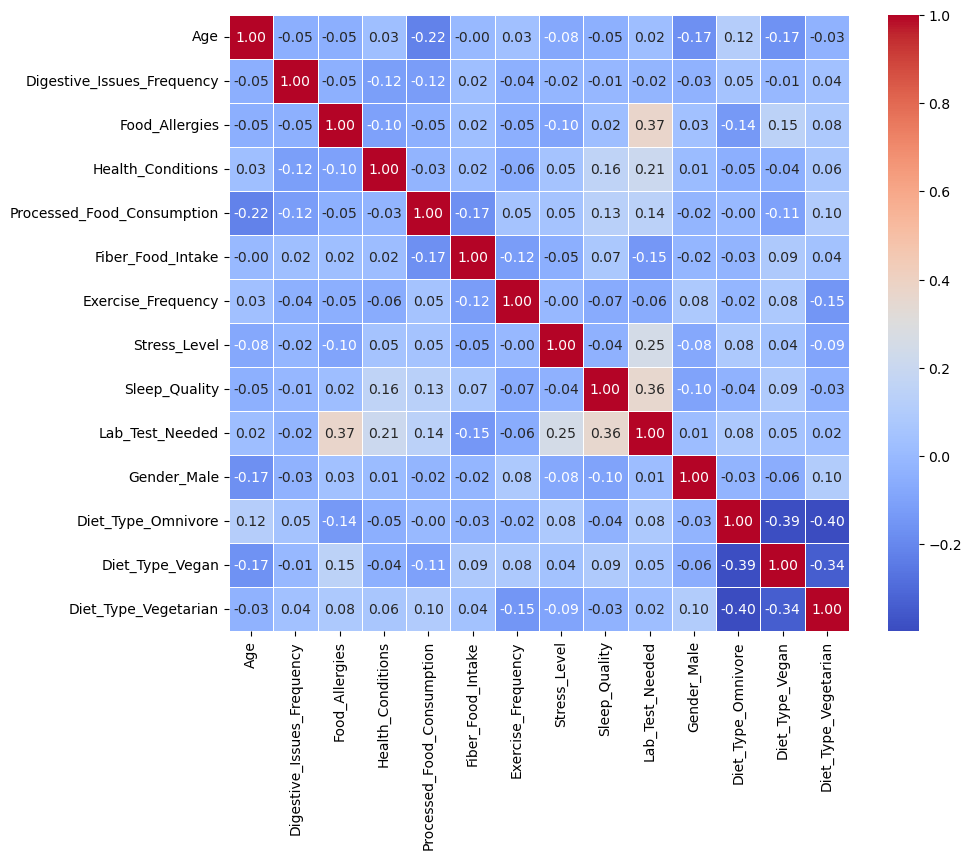

In [366]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = questionnaire_df.corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


In [367]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Step 1: Define your features (X) and target variable (y)
X = questionnaire_df.drop('Lab_Test_Needed', axis=1)  # Drop the target variable to get features
y = questionnaire_df['Lab_Test_Needed']  # Target variable

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform on test data (important!)

# Step 4: Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)  # Fit the model on the scaled training data

# Step 5: Get feature importances and sort them
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Display the most important features
print(feature_importance.head())


                      feature  importance
8               Sleep_Quality    0.202759
7                Stress_Level    0.189086
0                         Age    0.114145
2              Food_Allergies    0.104301
4  Processed_Food_Consumption    0.089754


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


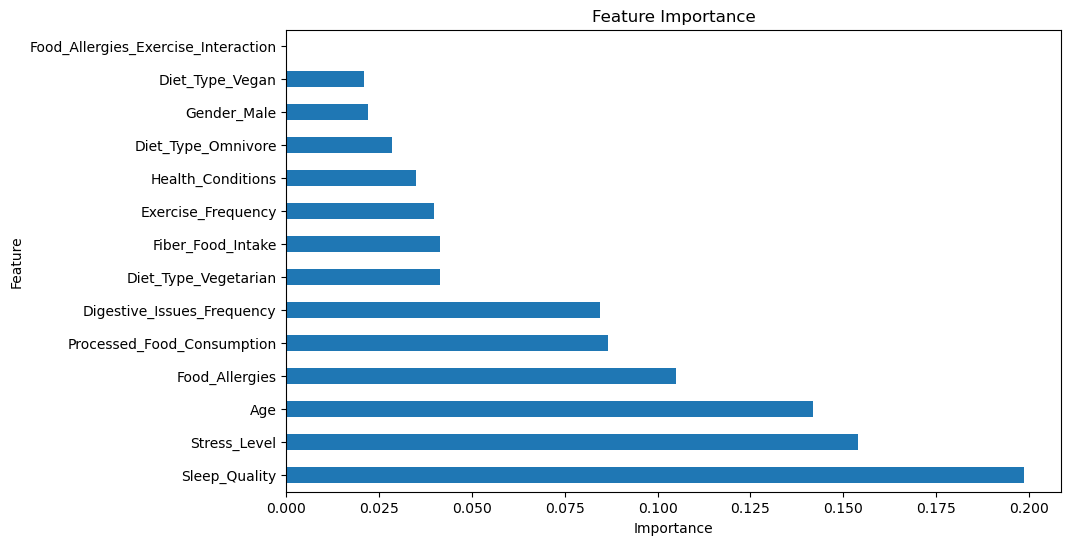

In [371]:
# Create interaction feature
questionnaire_df['Food_Allergies_Exercise_Interaction'] = questionnaire_df['Food_Allergies'] * questionnaire_df['Exercise_Frequency'].map({'Sedentary': 0, 'Occasional': 1, 'Regular': 2})

# Re-split and re-train the model with the new feature
X = questionnaire_df.drop('Lab_Test_Needed', axis=1)
y = questionnaire_df['Lab_Test_Needed']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Visualize feature importances
import matplotlib.pyplot as plt
feature_importance.plot.barh(x='feature', y='importance', legend=False, figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [373]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming `questionnaire_df` is your DataFrame with the dataset already loaded

# 1. Select the features you want to include in the model
selected_features = [
    'Age', 'Stress_Level', 'Food_Allergies',
    'Digestive_Issues_Frequency', 'Sleep_Quality', 'Processed_Food_Consumption'
]

# 2. Prepare the data (X and y)
X = questionnaire_df[selected_features]  # Feature matrix
y = questionnaire_df['Lab_Test_Needed']  # Target variable

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Create an XGBoost model
model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# 5. Train the XGBoost model
model.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = model.predict(X_test)

# 7. Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.7333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.73      0.73      0.73        15

    accuracy                           0.73        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.73      0.73      0.73        30

Confusion Matrix:
 [[11  4]
 [ 4 11]]


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:54:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [375]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(comparison_df.head())  # Show the first few rows

    Actual  Predicted
83       1          1
53       1          1
70       1          1
45       0          0
44       1          0


In [377]:
# Sample size
n_samples = 10

np.random.seed(45)

# Generate demographics
demographics = {
    'Age': np.random.randint(20, 70, n_samples),
    'Gender': np.random.choice(['Male', 'Female'], n_samples)
}

# Generate health symptoms
health_symptoms = {
    'Digestive_Issues_Frequency': np.random.choice(['Never', 'Sometimes', 'Often', 'Always'], n_samples, p=[0.25, 0.5, 0.15, 0.1]),
    'Food_Allergies': np.random.choice([0, 1], n_samples, p=[0.7, 0.3]),  # 0: No, 1: Yes
    'Health_Conditions': np.random.choice([0, 1], n_samples, p=[0.8, 0.2])  # 0: No, 1: Yes (e.g., IBS, sensitivities)
}

# Generate dietary habits
dietary_habits = {
    'Diet_Type': np.random.choice(['Omnivore', 'Vegetarian', 'Vegan', 'Gluten-Free'], n_samples),
    'Processed_Food_Consumption': np.random.choice(['Rarely', 'Sometimes', 'Often'], n_samples, p=[0.3, 0.5, 0.2]),
    'Fiber_Food_Intake': np.random.choice(['Rarely', 'Sometimes', 'Often'], n_samples, p=[0.2, 0.5, 0.3])
}

# Generate lifestyle factors
lifestyle_factors = {
    'Exercise_Frequency': np.random.choice(['Sedentary', 'Occasional', 'Regular'], n_samples, p=[0.4, 0.4, 0.2]),
    'Stress_Level': np.random.randint(1, 11, n_samples),  # 1 to 10 scale
    'Sleep_Quality': np.random.randint(1, 11, n_samples)  # 1 to 10 scale
}

In [379]:
# Combine all data into a DataFrame
questionnaire_df1 = pd.DataFrame({**demographics, **health_symptoms, **dietary_habits, **lifestyle_factors})

# Display first few rows of the questionnaire dataset
questionnaire_df1.head()

,Age,Gender,Digestive_Issues_Frequency,Food_Allergies,Health_Conditions,Diet_Type,Processed_Food_Consumption,Fiber_Food_Intake,Exercise_Frequency,Stress_Level,Sleep_Quality
0,31,Male,Always,0,0,Omnivore,Rarely,Sometimes,Sedentary,8,3
1,50,Female,Sometimes,0,0,Omnivore,Often,Sometimes,Sedentary,4,4
2,23,Female,Sometimes,0,1,Omnivore,Rarely,Rarely,Sedentary,6,10
3,52,Male,Sometimes,0,0,Omnivore,Rarely,Sometimes,Occasional,6,7
4,51,Male,Always,1,0,Gluten-Free,Rarely,Sometimes,Regular,8,4


In [381]:
from sklearn.preprocessing import LabelEncoder

# Encode ordinal features
label_encoder = LabelEncoder()
questionnaire_df1['Digestive_Issues_Frequency'] = label_encoder.fit_transform(questionnaire_df1['Digestive_Issues_Frequency'])
questionnaire_df1['Fiber_Food_Intake'] = label_encoder.fit_transform(questionnaire_df1['Fiber_Food_Intake'])
questionnaire_df1['Processed_Food_Consumption'] = label_encoder.fit_transform(questionnaire_df1['Processed_Food_Consumption'])
questionnaire_df1['Exercise_Frequency'] = label_encoder.fit_transform(questionnaire_df1['Exercise_Frequency'])

In [383]:
# One-Hot Encoding for nominal data
questionnaire_df1 = pd.get_dummies(questionnaire_df1, columns=['Gender', 'Diet_Type'], drop_first=True)

In [385]:
questionnaire_df1

,Age,Digestive_Issues_Frequency,Food_Allergies,Health_Conditions,Processed_Food_Consumption,Fiber_Food_Intake,Exercise_Frequency,Stress_Level,Sleep_Quality,Gender_Male,Diet_Type_Omnivore,Diet_Type_Vegan
0,31,0,0,0,1,2,2,8,3,True,True,False
1,50,2,0,0,0,2,2,4,4,False,True,False
2,23,2,0,1,1,1,2,6,10,False,True,False
3,52,2,0,0,1,2,0,6,7,True,True,False
4,51,0,1,0,1,2,1,8,4,True,False,False
5,41,2,0,0,0,2,1,2,7,False,False,True
6,55,2,1,0,2,2,2,1,2,True,True,False
7,24,2,0,0,1,0,2,3,10,True,False,False
8,35,2,1,0,1,2,0,2,2,False,False,False
9,21,1,0,0,0,1,1,10,8,True,True,False


In [387]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
numerical_columns = ['Age', 'Stress_Level', 'Sleep_Quality']
scaler = StandardScaler()

# Apply scaling to the numerical features
questionnaire_df1[numerical_columns] = scaler.fit_transform(questionnaire_df1[numerical_columns])

In [389]:
questionnaire_df1

,Age,Digestive_Issues_Frequency,Food_Allergies,Health_Conditions,Processed_Food_Consumption,Fiber_Food_Intake,Exercise_Frequency,Stress_Level,Sleep_Quality,Gender_Male,Diet_Type_Omnivore,Diet_Type_Vegan
0,-0.581844,0,0,0,1,2,2,1.035098,-0.920158,True,True,False
1,0.932545,2,0,0,0,2,2,-0.345033,-0.579358,False,True,False
2,-1.219482,2,0,1,1,1,2,0.345033,1.465436,False,True,False
3,1.091954,2,0,0,1,2,0,0.345033,0.443039,True,True,False
4,1.012249,0,1,0,1,2,1,1.035098,-0.579358,True,False,False
5,0.215203,2,0,0,0,2,1,-1.035098,0.443039,False,False,True
6,1.331068,2,1,0,2,2,2,-1.380131,-1.260957,True,True,False
7,-1.139777,2,0,0,1,0,2,-0.690066,1.465436,True,False,False
8,-0.263025,2,1,0,1,2,0,-1.035098,-1.260957,False,False,False
9,-1.378891,1,0,0,0,1,1,1.725164,0.783838,True,True,False


In [391]:
test_data = questionnaire_df1[selected_features]

In [393]:
# 8. Make predictions on the test data
test_predictions = model.predict(test_data)

# 9. Output the predictions (Lab Test Needed: 1 or 0)
questionnaire_df1['Lab_Test_Needed_Prediction'] = test_predictions

# Print the predictions alongside the original test data
print(questionnaire_df1[['Age', 'Stress_Level', 'Food_Allergies', 'Health_Conditions', 'Digestive_Issues_Frequency', 'Sleep_Quality', 'Lab_Test_Needed_Prediction']])

        Age  Stress_Level  Food_Allergies  Health_Conditions  \
0 -0.581844      1.035098               0                  0   
1  0.932545     -0.345033               0                  0   
2 -1.219482      0.345033               0                  1   
3  1.091954      0.345033               0                  0   
4  1.012249      1.035098               1                  0   
5  0.215203     -1.035098               0                  0   
6  1.331068     -1.380131               1                  0   
7 -1.139777     -0.690066               0                  0   
8 -0.263025     -1.035098               1                  0   
9 -1.378891      1.725164               0                  0   

   Digestive_Issues_Frequency  Sleep_Quality  Lab_Test_Needed_Prediction  
0                           0      -0.920158                           0  
1                           2      -0.579358                           0  
2                           2       1.465436                          